# 2D Isostatic gravity inversion - Lines localization

Este [IPython Notebook](http://ipython.org/videos.html#the-ipython-notebook) utiliza a biblioteca de código aberto [Fatiando a Terra](http://fatiando.org/)

In [1]:
#%matplotlib inline
import os
import numpy as np
from scipy.misc import derivative
import scipy as spy
from scipy import interpolate
import matplotlib
matplotlib.use('TkAgg', force=True)
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy import config

import math
import cPickle as pickle
import datetime
#from IPython.display import Image as img
#from IPython.display import Markdown as md
#from IPython.display import display as dp
import string as st

from scipy.misc import imread

from __future__ import division

from fatiando import gravmag, mesher, utils, gridder
from fatiando.mesher import Prism, Polygon
from fatiando.gravmag import prism
from fatiando.utils import ang2vec, si2nt, contaminate
from fatiando.gridder import regular, profile
from fatiando.vis import mpl

from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal
from pytest import raises

plt.rc('font', size=16)

/Users/macelabastos/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import functions as fc

## Model parameters

In [3]:
# Model`s limits
ymin = 0.0
ymax = 383000.0
zmin = -1000.0
zmax = 45000.0
xmin = -100000.0
xmax = 100000.0

area = [ymin, ymax, zmax, zmin]

## Prisms coordenates.

In [4]:
ny = 150 # number of observation datas and number of prisms along the profile
# coordinates defining the horizontal boundaries of the
# adjacent columns along the profile
y = np.linspace(ymin, ymax, ny)

## Observation coordinates.

In [5]:
# coordinates of the center of the columns forming the
# interpretation model
n = ny - 1
dy = (ymax - ymin)/n
ycmin = ymin + 0.5*dy
ycmax = ymax - 0.5*dy
yc = np.reshape(np.linspace(ycmin, ycmax, n),(n,1))
x = np.zeros_like(yc)
z = np.zeros_like(yc)-150.0

## Observed data

In [6]:
ycoord_51w = np.loadtxt('../data/EIGEN-6C4_campos_pelotas_2km_ang2coord_51w_x.txt')
xcoord_51w = np.loadtxt('../data/EIGEN-6C4_campos_pelotas_2km_ang2coord_51w_y.txt')
gz_xy_51w = np.loadtxt('../data/EIGEN-6C4_campos_pelotas_2km_ang2coord_51w_gz.txt')

In [7]:
point1_51w = [6930713.2906511000, 773335.4440998170]
point2_51w = [6703542.0000000000, 1086594.000000000]

In [8]:
gz_profile_51w = profile(xcoord_51w, ycoord_51w, gz_xy_51w, point1_51w, point2_51w, n, extrapolate=False)

In [9]:
gobs_51w = np.reshape(gz_profile_51w[3],(n,1))

## Bathymetry data

## Lines localization

In [10]:
ymap,xmap,gmap = np.loadtxt('../data/EIGEN-6C4_campos_pelotas_2km_v3.txt', usecols=(0,1,2), unpack=True)

In [11]:
px_map_51w = [-27.72021025, -29.65973310]
py_map_51w = [-48.22775894, -44.94437298]

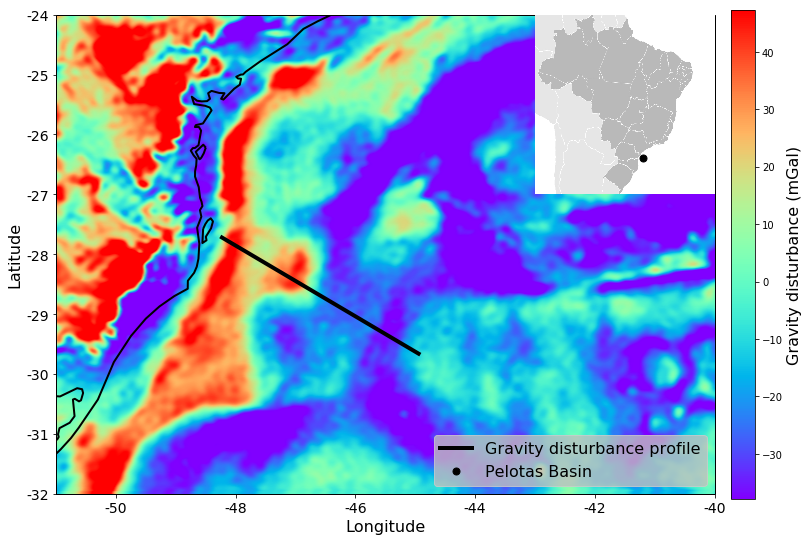

In [15]:
%matplotlib inline
plt.close('all')
plt.figure(figsize=(12,10)) 


ax = plt.axes(projection=ccrs.PlateCarree())

cax = ax.scatter(ymap,xmap,c=gmap,vmin=np.min(gobs_51w),vmax=np.max(gobs_51w),cmap='rainbow',zorder=0)
cbar = plt.colorbar(cax,shrink=0.7,pad=0.02)
cbar.ax.set_ylabel('Gravity disturbance (mGal)', fontsize=16)
ax.plot(py_map_51w,px_map_51w,'-k',linewidth=4,label='Gravity disturbance profile')

ax.set_extent([-51, -40, -32, -24], crs=ccrs.Geodetic())
ax.coastlines(resolution='50m', color='black', linewidth=2, zorder=15)

img = imread('../manuscript/figures/brazilian_map.jpeg')
img_extent = ([-43, -40, -27, -24])
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), zorder=10)
ax.plot(-41.2, -26.4, 'ko', markersize=7, label='Pelotas Basin', transform=ccrs.Geodetic(), zorder=20)

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['%g'% (l) for l in ax.get_xticks()], fontsize=14)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(['%g'% (l) for l in ax.get_yticks()], fontsize=14)
ax.set_xlim(-51., -40.)

ax.legend(loc='lower right', fontsize=16, facecolor='silver')

plt.tight_layout()

#mpl.savefig('../manuscript/figures/map-line-localization.png', dpi='figure', bbox_inches='tight')
plt.show()